In [474]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [475]:
#Importing data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning 1/Linear_Regression_Assignment/day.csv',index_col=[0])

In [476]:
#glimpse of the data
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [477]:
#checking dimensions
data.shape

(730, 15)

In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [479]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Analysis(Getting familiar with data)

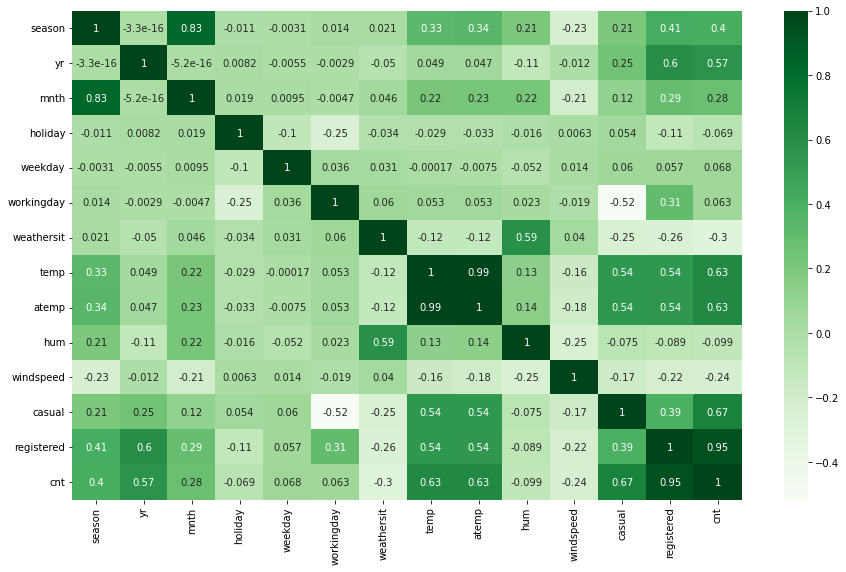

In [480]:
 #checking correlation between the initial variables.
plt.figure(figsize=[15,9])
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


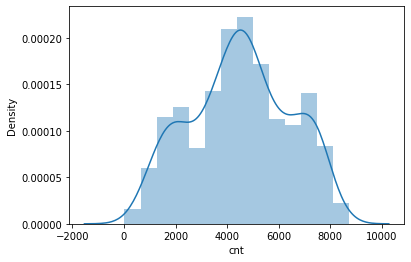

In [481]:
#checking distribution of the target variable.
sns.distplot(data.cnt)

In [482]:
#defining function for plotting bar plots with target variable.
def bar(x_col):
  return sns.barplot(x=x_col,y=data.cnt,data=data,hue=data.yr)

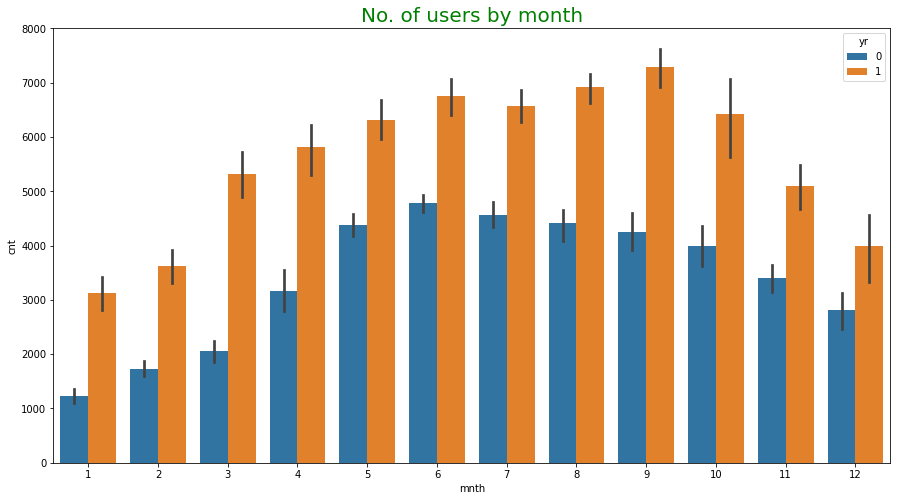

In [483]:
#analysing target variable with months variable
plt.figure(figsize=[15,8])
bar(data.mnth)
plt.title('No. of users by month' , fontsize=20, color='Green')
plt.show()

#Observations
#There is high demand during summer and fall season.
#Demands decrease as winters come in.

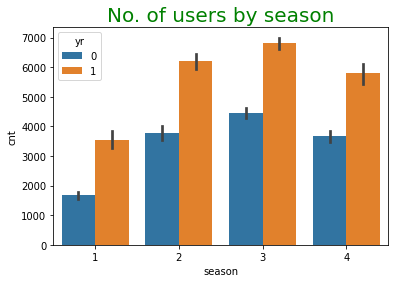

In [484]:
#Analysing data as per seasons.

bar(data.season)
plt.title('No. of users by season' , fontsize=20, color='Green')
plt.show()
#Observation
#Most of the demand is during the fall season.
#Least demand during Spring.

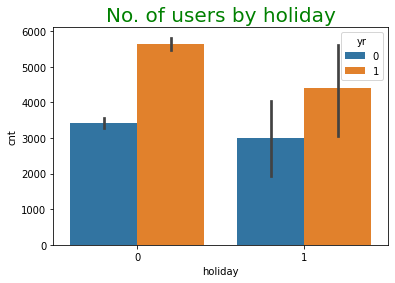

In [485]:
#Analysing target variable with day as holiday or not.

bar(data.holiday)
plt.title('No. of users by holiday' , fontsize=20, color='Green')
plt.show()
#Observation
#People use bikes less on holidays.

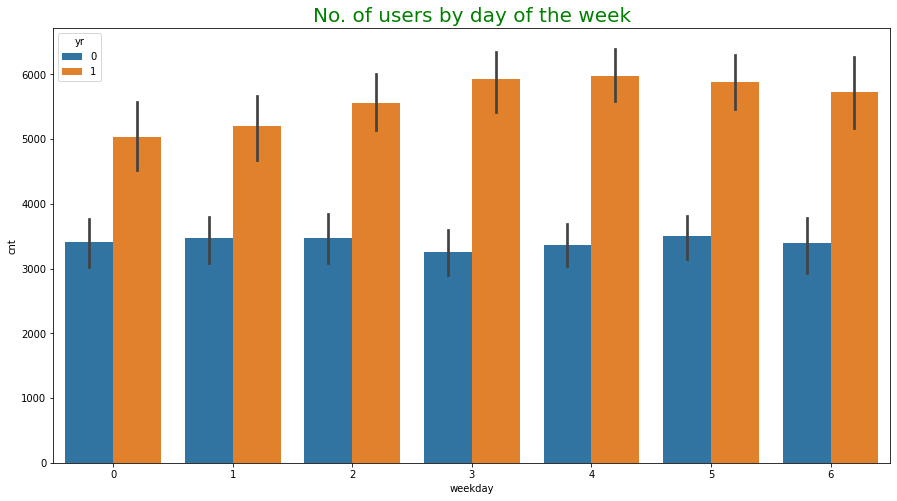

In [486]:
#Analysing data as per the days of the week
plt.figure(figsize=[15,8])
bar(data.weekday)
plt.title('No. of users by day of the week' , fontsize=20, color='Green')
plt.show()
#Observation
#Not a clear indicator.

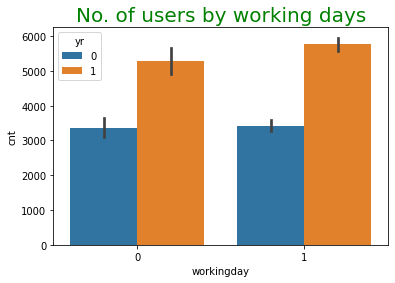

In [487]:
#Analysing target variable with working days

bar(data.workingday)
plt.title('No. of users by working days' , fontsize=20, color='Green')
plt.show()
#Observation
#Not a clear indicator.

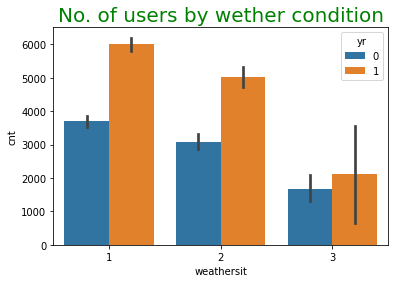

In [488]:
#Analysing target variable with the weather.
bar(data.weathersit)
plt.title('No. of users by wether condition' , fontsize=20, color='Green')
plt.show()
#Obsevation
#Most people use bikes when its Clear, Few clouds or Partly cloudy.
#No one use bikes during Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as there is no data for it.
#Less people use bikes during Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.

In [489]:
data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [490]:
data.weathersit.unique()

array([2, 1, 3])

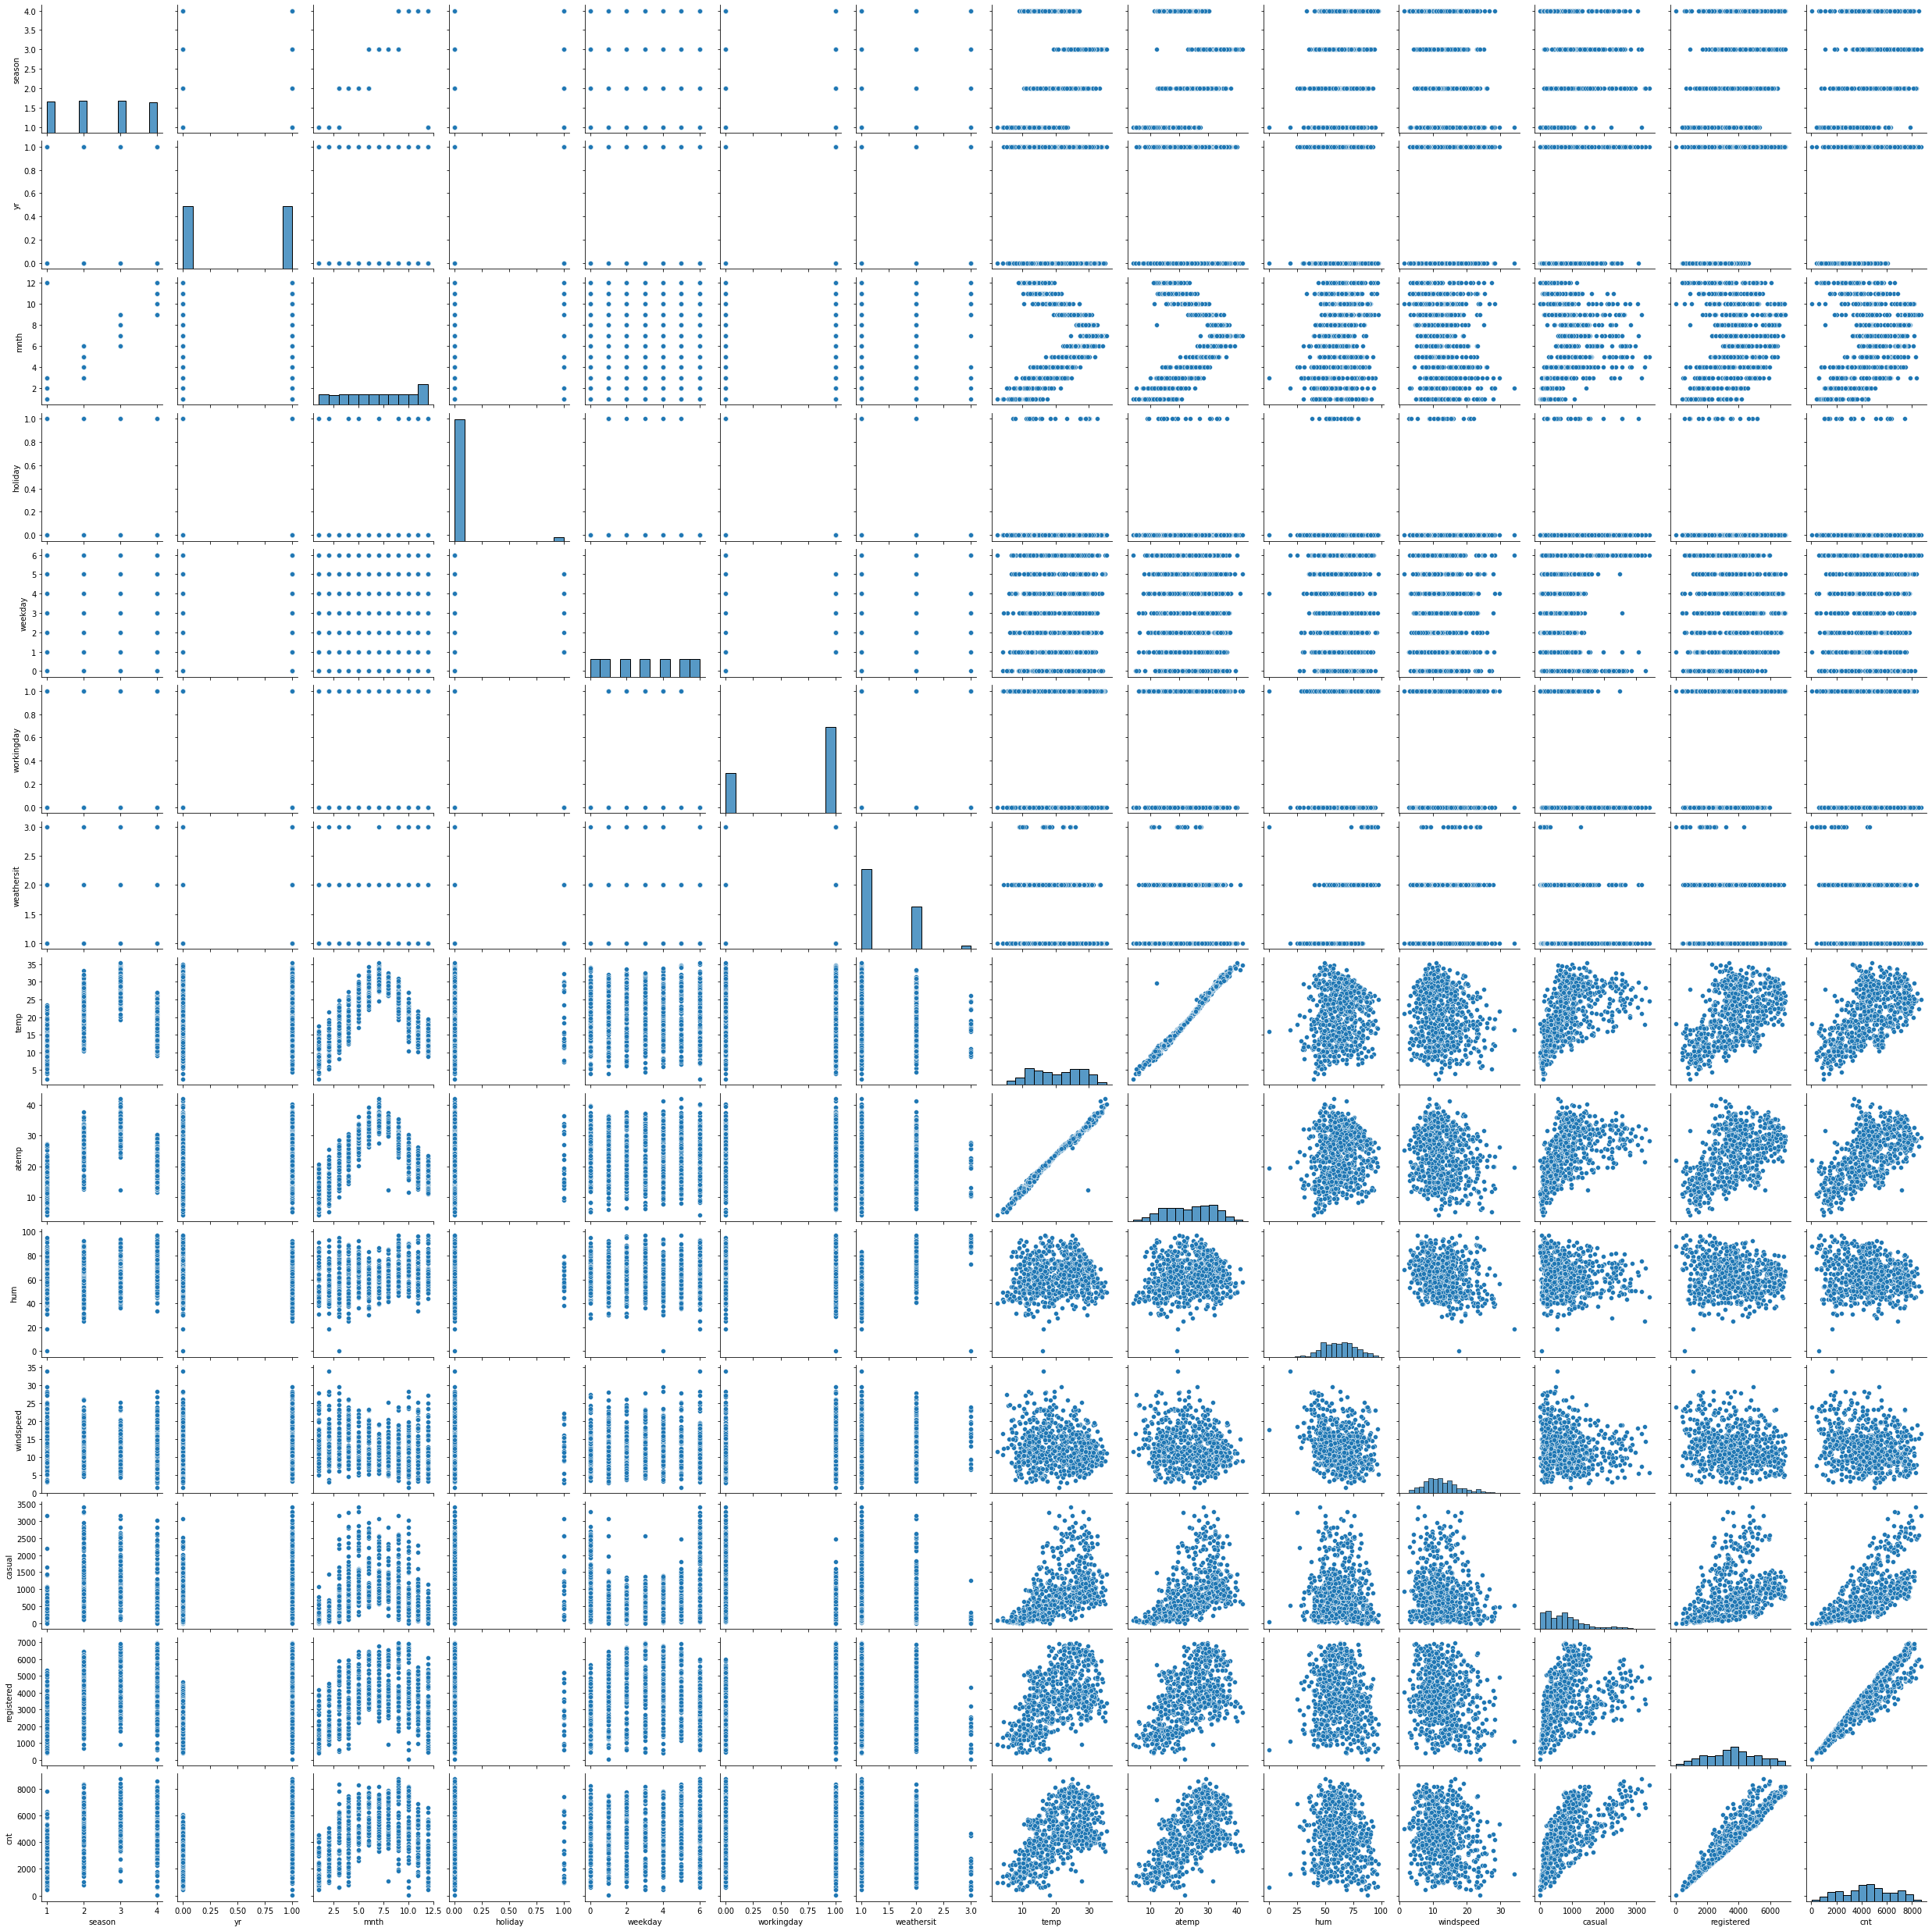

In [491]:
sns.pairplot(data)

## Data Preperation And Analysis

In [492]:
#dropping casual and registered user counts as the target variable is the sum of these two variables which makes them redundant.
data = data.drop(['casual',
       'registered'],axis = 1)

In [493]:
#dropping temp column which represent the actual temperature.
#Using atemp instead as people work on the basis of the temperature they deel rather than looking at the satellite calculated temperature.
data = data.drop('temp',axis=1)

In [494]:
#Data Driven Metric
#We already have month and year columns in our data so creating days data for analysis and modelling.
data['day'] = pd.DatetimeIndex(data['dteday']).day

In [495]:
#Creating new dataset of day and the target variable to analyse.
data1 = data.loc[:,['cnt','day']]

In [496]:
#Grouping the target variable with respect to days and adding values of the target variable.
data1 = data1.groupby(by='day').sum()

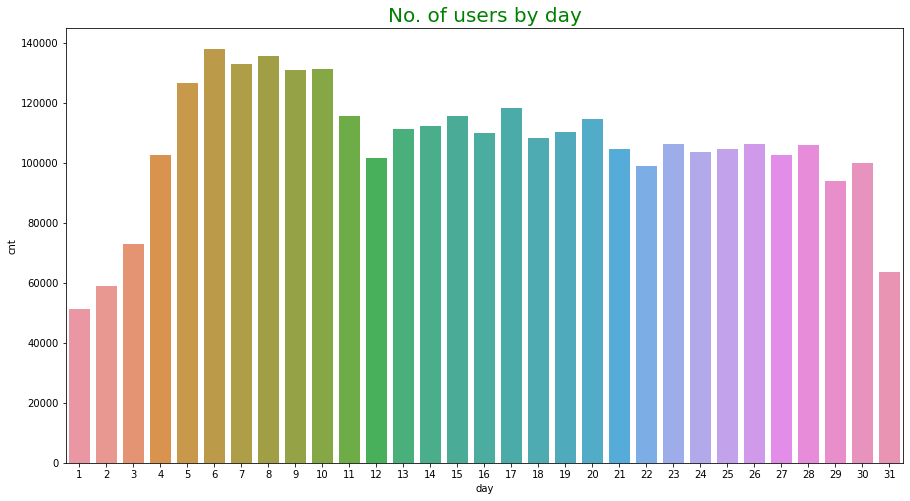

In [497]:
#Plotting target variable with the day of the month.
plt.figure(figsize = [15,8])
sns.barplot(y=data1.cnt,x=data1.index,data=data1)
plt.title('No. of users by day' , fontsize=20, color='Green')
plt.show()

#Observation
#Less people use bikes during the first and last day of the month.
#More people prefer bikes during the second week of the month.
#The demand decreases slowly as the month ends.

In [498]:
#dropping the dates column
data = data.drop('dteday',axis=1)

## Data Preperation

Converting the data values to the actual values. This will help in creating the dummy variables.

In [499]:
#Defining function to convert the season number into season name.
def seas(x):
  if x == 1:
    return "spring"
  elif x == 2:
    return "summer"
  elif x== 3:
    return "fall"
  else:
    return "winter"

In [500]:
#applying the function to convert the values.
data.season = data.season.apply(seas)

In [501]:
#Defining function to convert the months values into month names.
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
def mnt(x):
  if x == 1:
    return months[x-1]
  elif x == 2:
    return months[x-1]
  elif x== 3:
    return months[x-1]
  elif x == 4:
    return months[x-1]
  elif x == 5:
    return months[x-1]
  elif x == 6:
    return months[x-1]
  elif x == 7:
    return months[x-1]
  elif x == 8:
    return months[x-1]
  elif x == 9:
    return months[x-1]
  elif x == 10:
    return months[x-1]
  elif x == 11:
    return months[x-1]
  else:
    return months[x-1]

In [502]:
#Applying function to the dataset to covnert the values of column month.
data.mnth = data.mnth.apply(mnt)

In [503]:
#Defining function to convert the day number into day name.
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]
def day(x):
  if x == 0:
    return weekdays[x]
  elif x == 1:
    return weekdays[x]
  elif x == 2:
    return weekdays[x]
  elif x == 3:
    return weekdays[x]
  elif x == 4:
    return weekdays[x]
  elif x == 5:
    return weekdays[x]
  elif x == 6:
    return weekdays[x]

In [504]:
#Applying function to convert the values.
data.weekday = data.weekday.apply(day)

In [505]:
#Defining function to convert the weather numbers into weather details.
weather = ['Clear, Few clouds, Partly cloudy, Partly cloudy','Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist','Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds','Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']
def weat(x):
  if x == 1:
    return weather[x-1]
  elif x == 2:
    return weather[x-1]
  elif x== 3:
    return weather[x-1]
  elif x == 4:
    return weather[x-1]

In [506]:
#Applying function to convert the values in dataset
data.weathersit = data.weathersit.apply(weat)

In [507]:
#defining function to plot scatter plots of columns with target variable.
def scat(a):
  sns.scatterplot(x=a,y=data.cnt,data=data)

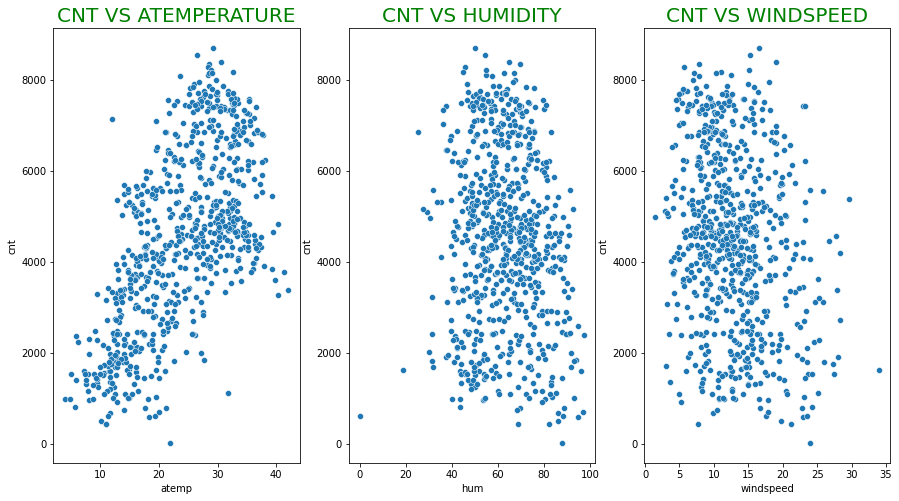

In [508]:
#Plotting scatter plots of target variable with continuous columns.
plt.figure(figsize = [15,8])
plt.subplot(1,3,1)
scat(data.atemp)
plt.title('CNT VS ATEMPERATURE' , fontsize=20, color='Green')
plt.subplot(1,3,2)
scat(data.hum)
plt.title('CNT VS HUMIDITY' , fontsize=20, color='Green')
plt.subplot(1,3,3)
scat(data.windspeed)
plt.title('CNT VS WINDSPEED' , fontsize=20, color='Green')
plt.show()
#Observations
#There is a slight linear correlation between the target variable and atemp.
#There is no pattern for target variable with hum and windspeed.

## Creating Dummy Variables.

In [509]:
#Creating dummy variables for season variable.
status = pd.get_dummies(data['season'],drop_first=True)
status.head()

,spring,summer,winter
instant,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [510]:
#Adding dummy variables to the dataset.
data=pd.concat((data,status),axis=1)

In [511]:
#Creating dummy variables for month variable.
status = pd.get_dummies(data['mnth'],drop_first=True)
status.head()

,August,December,February,January,July,June,March,May,November,October,September
instant,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0


In [512]:
#Adding dummy variables to the dataset.
data=pd.concat((data,status),axis=1)

In [513]:
#Creating dummy variables for weekday column.
status = pd.get_dummies(data['weekday'],drop_first=True)
status.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
5,0,0,0,1,0,0


In [514]:
#Adding dummy variables to the dataset.
data=pd.concat((data,status),axis=1)

In [515]:
#Creating dummy variables for weather column.
status = pd.get_dummies(data['weathersit'])
status.head()

,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
instant,,,
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
5,1,0,0


In [516]:
#Adding dummy variables to the dataset.
data=pd.concat((data,status),axis=1)

In [517]:
data.head() #glimpse of data after adding the dummy variables.

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,0,January,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
2,spring,0,January,0,Monday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",17.68695,69.6087,16.652113,...,0,1,0,0,0,0,0,0,0,1
3,spring,0,January,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.47025,43.7273,16.636703,...,0,0,0,0,0,1,0,1,0,0
4,spring,0,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,1,0,0
5,spring,0,January,0,Thursday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",11.46350,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [518]:
#Dropping the categorical columns as we already have the dummy variables for all these columns.
data = data.drop(['season','mnth','weekday','weathersit'],axis=1)

In [519]:
data.head() #Glimpse of the final data.

,yr,holiday,workingday,atemp,hum,windspeed,cnt,day,spring,summer,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,18.18125,80.5833,10.749882,985,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,17.68695,69.6087,16.652113,801,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,9.47025,43.7273,16.636703,1349,1,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,10.60610,59.0435,10.739832,1562,1,1,0,...,0,0,0,0,0,0,1,1,0,0
5,0,0,1,11.46350,43.6957,12.522300,1600,1,1,0,...,0,0,0,0,1,0,0,1,0,0


In [520]:
data.shape #shape of the final data.

(730, 31)

In [521]:
data.columns #Columns in final data.


Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'day', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [522]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 31 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   yr                                                                                       730 non-null    int64  
 1   holiday                                                                                  730 non-null    int64  
 2   workingday                                                                               730 non-null    int64  
 3   atemp                                                                                    730 non-null    float64
 4   hum                                                                                      730 non-null    float64
 5   windspeed                                                       

In [523]:
data.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,day,spring,summer,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,23.726322,62.765175,12.763620,4508.006849,15.720548,0.246575,0.252055,...,0.082192,0.143836,0.142466,0.143836,0.141096,0.143836,0.142466,0.634247,0.028767,0.336986
std,0.500343,0.167266,0.465405,8.150308,14.237589,5.195841,1936.011647,8.802278,0.431313,0.434490,...,0.274845,0.351164,0.349767,0.351164,0.348359,0.351164,0.349767,0.481971,0.167266,0.473004
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000,16.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000,23.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000,31.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Scaling And Splitting Data

In [524]:
#Splitting the data into 70% training data ad 30% testing data.
data_train,data_test = train_test_split(data,train_size=0.7,random_state=100) 

In [525]:
#Scaling the continuous variables using MINMAX scaler.
scaler=MinMaxScaler()
num_vars = ['atemp','hum','windspeed','cnt','day']

data_train[num_vars]=scaler.fit_transform(data_train[num_vars])

In [526]:
data_train.head() #Glimpse of scaled data.

,yr,holiday,workingday,atemp,hum,windspeed,cnt,day,spring,summer,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.766351,0.725633,0.264686,0.827658,1.000000,0,0,...,0,0,0,0,0,0,1,1,0,0
427,1,0,0,0.438975,0.640189,0.255342,0.465255,0.066667,1,0,...,0,0,0,1,0,0,0,0,0,1
729,1,0,0,0.200348,0.498067,0.663106,0.204096,0.966667,1,0,...,0,1,0,0,0,0,0,1,0,0
483,1,0,0,0.391735,0.504508,0.188475,0.482973,0.900000,0,1,...,0,0,0,1,0,0,0,0,0,1
112,0,0,1,0.318819,0.751824,0.380981,0.191095,0.700000,0,1,...,0,0,1,0,0,0,0,0,0,1


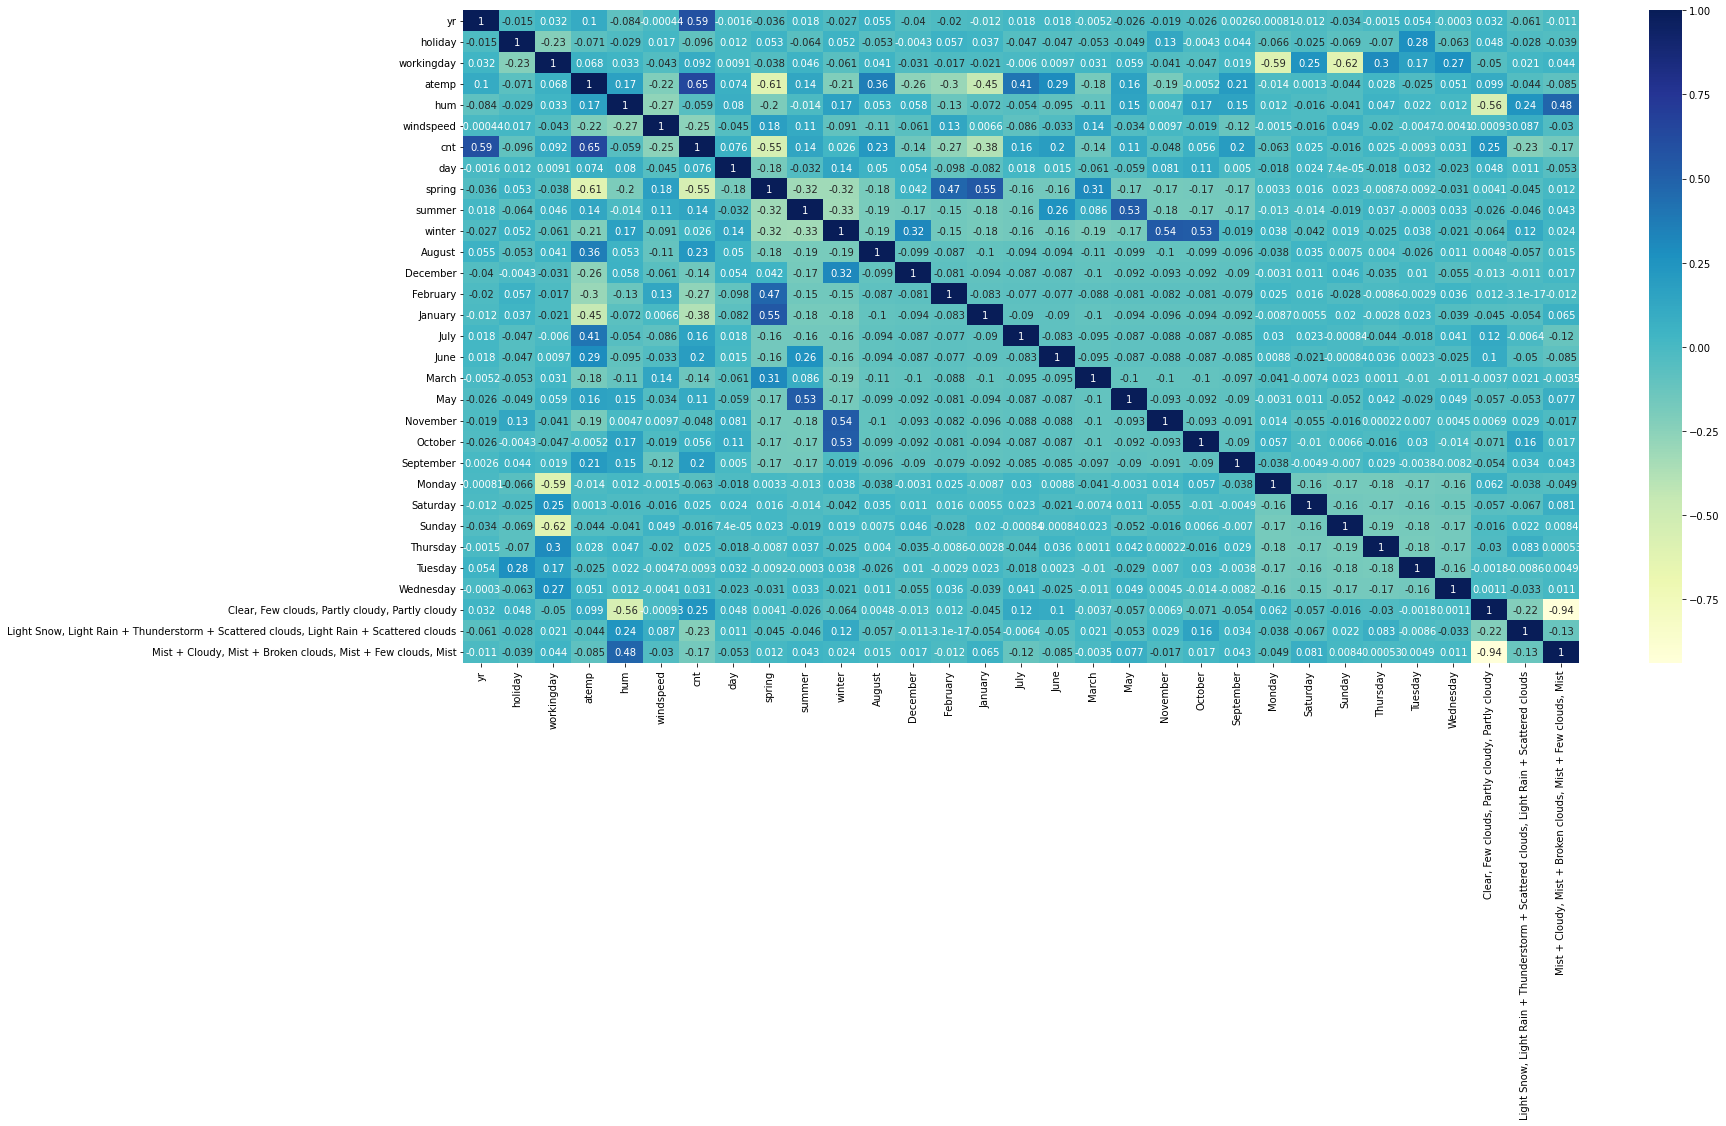

In [527]:
#Plotting heatmap to look at the correlation of complete data. 
plt.figure(figsize=[25,12])
sns.heatmap(data_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

#Observation
#The target variable and atemp have highest correlation.
#The target variable and yr have good Correlation.


In [528]:
#Splitting the target variable from the training data.
y_train = data_train.pop('cnt')
X_train = data_train

In [529]:
#Using Recursive Feature Elimination feature of SKlearn and selecting 15 variables from the dataset. 
lm = LinearRegression()
lm.fit(X_train, y_train)                          # fitting training data to linear regression instance

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)                   #fitting the training data to RFE.

In [530]:
#List of columns selected for training using RFE.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 14),
 ('spring', False, 6),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', True, 1),
 ('December', False, 3),
 ('February', False, 2),
 ('January', True, 1),
 ('July', False, 9),
 ('June', False, 8),
 ('March', False, 16),
 ('May', False, 7),
 ('November', False, 4),
 ('October', False, 15),
 ('September', True, 1),
 ('Monday', False, 5),
 ('Saturday', False, 10),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 13),
 ('Wednesday', False, 12),
 ('Clear, Few clouds, Partly cloudy, Partly cloudy', True, 1),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', True, 1)]

In [531]:
#Extracting the selected list of columns by RFE.
col = X_train.columns[rfe.support_]

In [532]:
#Creating new dataset with selected columns.
X_train_rfe = X_train[col]

In [533]:
#Training the first model.
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

#Observation
#The model is able to explain 84.3% of the data.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.52e-188
Time:                        10:20:38   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [534]:
#Dropping holiday variable on the basis of p-value greater than 0.05.
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [535]:
#Training the model again with the new dataset.
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

#Observation
#The model is able to explain 84.2% of data.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          6.87e-189
Time:                        10:20:38   Log-Likelihood:                 508.85
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -930.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [536]:
#Calculating Variance Inflation Factor.
vif=pd.DataFrame()
vif['features']= X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
12,"Clear, Few clouds, Partly cloudy, Partly cloudy",inf
13,"Light Snow, Light Rain + Thunderstorm + Scatte...",inf
14,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",inf
3,atemp,1.91
4,hum,1.89
2,workingday,1.65
11,Sunday,1.65
7,winter,1.56
9,January,1.55
6,summer,1.48


In [537]:
#Dropping columns on the basis of VIF to avoid Multicollinearity.
X_train_new = X_train_new.drop(['Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],axis=1)

In [538]:
#Training the Model Again.
#This time not adding constant as it is already present in the training data.
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

#observation
#The model is able to explain 84.2% of data.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          6.87e-189
Time:                        10:20:38   Log-Likelihood:                 508.85
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -930.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [539]:
#Calculating VIF for the rest of the columns.
vif=pd.DataFrame()
vif['features']= X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
0,const,75.42
3,atemp,1.91
4,hum,1.89
2,workingday,1.65
11,Sunday,1.65
12,"Clear, Few clouds, Partly cloudy, Partly cloudy",1.62
7,winter,1.56
9,January,1.55
6,summer,1.48
8,August,1.42


In [540]:
#Updating the training dataset.
X_train_new = X_train_new.drop(['const'],axis=1)

In [541]:
#Training the model again.

lm_1 = sm.OLS(y_train,X_train_new).fit()
print(lm_1.summary())

#Observation
#The model is able to explain 84.2%of data.

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1422.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                        10:20:38   Log-Likelihood:                          500.61
No. Observations:                 510   AIC:                                     -975.2
Df Residuals:                     497   BIC:                                     -920.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                                                                              coef    std err          t

In [542]:
#Calculating VIF fo the training columns.
vif=pd.DataFrame()
vif['features']= X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
3,hum,15.27
2,atemp,12.47
1,workingday,4.65
4,windspeed,4.01
11,"Clear, Few clouds, Partly cloudy, Partly cloudy",2.89
0,yr,2.05
6,winter,2.05
5,summer,1.97
10,Sunday,1.82
8,January,1.60


In [543]:
#Updating the training dataset with respect to VIF
X_train_new = X_train_new.drop(['hum'],axis=1)

In [544]:
#Training the model again.
X_train_lm_2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lm_2.summary())

#Observation
#THe model is able to explain 83.6% of variance in data.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.96e-186
Time:                        10:20:38   Log-Likelihood:                 499.50
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     497   BIC:                            -918.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [545]:
#Calculating VIF for the training variables 
vif=pd.DataFrame()
vif['features']= X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
2,atemp,7.15
1,workingday,4.23
3,windspeed,3.69
10,"Clear, Few clouds, Partly cloudy, Partly cloudy",2.73
0,yr,2.05
4,summer,1.90
9,Sunday,1.74
5,winter,1.57
6,August,1.57
8,September,1.30


In [546]:
#Updating dataset using VIF.
X_train_new = X_train_new.drop(['atemp'],axis=1)

In [547]:
#Training the model again
X_train_lm_3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lm_3.summary())

#Obsrvation
#The model is able to explain 70.7% of variance in data.
#Since it got reduced,this is not the optimum model but due to other factos as p-value and VIF this is the most balanced model.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     109.1
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          6.17e-125
Time:                        10:20:38   Log-Likelihood:                 351.63
No. Observations:                 510   AIC:                            -679.3
Df Residuals:                     498   BIC:                            -628.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [548]:
#Calculating VIF for the training dataset.
vif=pd.DataFrame()
vif['features']= X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
2,windspeed,3.58
1,workingday,3.53
9,"Clear, Few clouds, Partly cloudy, Partly cloudy",2.37
0,yr,1.95
3,summer,1.72
8,Sunday,1.61
4,winter,1.55
5,August,1.28
6,January,1.23
7,September,1.15


## Evluation and Predictions.

In [549]:
#Predicting the target variable using the most balanced trained model.
y_train_pred = lm_3.predict(X_train_lm_3)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

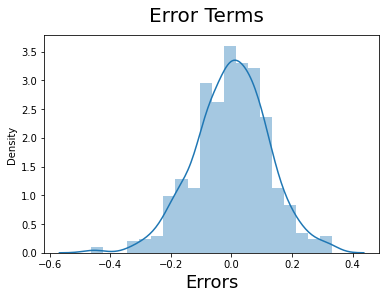

In [550]:
#Plotting the graph of errors to validate the assumption as the mean of errors lies at 0.
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)           #Plotting graph.
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading .
plt.xlabel('Errors', fontsize = 18)                         #plotting label.

In [551]:
#Calculating r2 score for evaluation 
r2_score(y_true = y_train,y_pred=y_train_pred)

0.7066470492004129

In [552]:
#Preparing the test set.
num_vars = ['atemp','hum','windspeed','cnt','day']

data_test[num_vars]=scaler.transform(data_test[num_vars])

In [553]:
#Extracting the target variable.
y_test = data_test.pop('cnt')
X_test = data_test

In [554]:
#Creating the dataset as same as the training dataset.
X_test_new = X_test[X_train_new.columns]

In [555]:
#Adding the dummy variable to feed the model.
X_test_new = sm.add_constant(X_test_new)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [556]:
#Predicting the values of target variable
y_test_pred = lm_3.predict(X_test_new)

In [557]:
#Evaluating the model.
r2_score(y_true = y_test,y_pred=y_test_pred)

0.5729655806867655

Since the model is not the most appropriate and optimised model, r2_score for the test and train are not in the 5% range to each other, we will perform RFE again with a little less number of variables.

# Preparing dataset again

In [558]:
#Splitting the data into test train split.
data_train,data_test = train_test_split(data,train_size=0.7,random_state=100)

In [559]:
data_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,day,spring,summer,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,33.1448,70.4167,11.083475,7216,31,0,0,...,0,0,0,0,0,0,1,1,0,0
427,1,0,0,20.6746,62.1250,10.792293,4066,3,1,0,...,0,0,0,1,0,0,0,0,0,1
729,1,0,0,11.5850,48.3333,23.500518,1796,30,1,0,...,0,1,0,0,0,0,0,1,0,0
483,1,0,0,18.8752,48.9583,8.708325,4220,28,0,1,...,0,0,0,1,0,0,0,0,0,1
112,0,0,1,16.0977,72.9583,14.707907,1683,22,0,1,...,0,0,1,0,0,0,0,0,0,1


In [560]:
#Scaling the data using MIN MAX Scaler. 
scaler=MinMaxScaler()
num_vars = ['atemp','hum','windspeed','cnt','day']

data_train[num_vars]=scaler.fit_transform(data_train[num_vars])

In [561]:
data_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,day,spring,summer,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.766351,0.725633,0.264686,0.827658,1.000000,0,0,...,0,0,0,0,0,0,1,1,0,0
427,1,0,0,0.438975,0.640189,0.255342,0.465255,0.066667,1,0,...,0,0,0,1,0,0,0,0,0,1
729,1,0,0,0.200348,0.498067,0.663106,0.204096,0.966667,1,0,...,0,1,0,0,0,0,0,1,0,0
483,1,0,0,0.391735,0.504508,0.188475,0.482973,0.900000,0,1,...,0,0,0,1,0,0,0,0,0,1
112,0,0,1,0.318819,0.751824,0.380981,0.191095,0.700000,0,1,...,0,0,1,0,0,0,0,0,0,1


In [562]:
#Extracting the target variable 
y_train = data_train.pop('cnt')
X_train = data_train

In [563]:
#Running RFE
lm = LinearRegression()                           #Creating a linear regression instance
lm.fit(X_train, y_train)                          #Fitting the training dataset to the instance

rfe = RFE(lm,n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)                   # Fitting the dataset to RFE

In [564]:
#List of columns chosen by RFE.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 19),
 ('spring', False, 11),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 3),
 ('December', False, 8),
 ('February', False, 7),
 ('January', False, 6),
 ('July', False, 14),
 ('June', False, 13),
 ('March', False, 21),
 ('May', False, 12),
 ('November', False, 9),
 ('October', False, 20),
 ('September', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 15),
 ('Sunday', False, 4),
 ('Thursday', False, 16),
 ('Tuesday', False, 18),
 ('Wednesday', False, 17),
 ('Clear, Few clouds, Partly cloudy, Partly cloudy', True, 1),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', False, 2)]

In [565]:
#Extracting columns chosen by RFE.
col = X_train.columns[rfe.support_]

In [566]:
#Creating new dataset using RFE columns
X_train_rfe = X_train[col]

In [567]:
#Training the model.
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

#Observation
#The model is able to explain 83% of the variance in data.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.9
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          6.24e-185
Time:                        10:20:39   Log-Likelihood:                 491.00
No. Observations:                 510   AIC:                            -960.0
Df Residuals:                     499   BIC:                            -913.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [568]:
#Calculating VIF in the training variables.
vif=pd.DataFrame()
vif['features']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
0,const,63.32
4,hum,1.86
9,"Clear, Few clouds, Partly cloudy, Partly cloudy",1.60
3,atemp,1.28
7,winter,1.24
6,summer,1.20
5,windspeed,1.19
8,September,1.11
10,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.11
1,yr,1.03


In [569]:
#Updating dataset with respect to RFE.
X_train_new_1 = X_train_rfe.drop(['const'],axis=1)

In [570]:
#Training the model again.
lm_1 = sm.OLS(y_train,X_train_new_1).fit() 
print(lm_1.summary())

#Observation
#The model is able to explain 97% variance in data.
#The probability of F-statistic variable is 0 which means this model in not statistically fit. Hence we discard the model and use the previous model as optimum model.

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1692.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                        10:20:39   Log-Likelihood:                          477.24
No. Observations:                 510   AIC:                                     -934.5
Df Residuals:                     500   BIC:                                     -892.1
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                                                                              coef    std err          t

## Prediction and Validation

In [571]:
y_train_pred = lm.predict(X_train_rfe)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

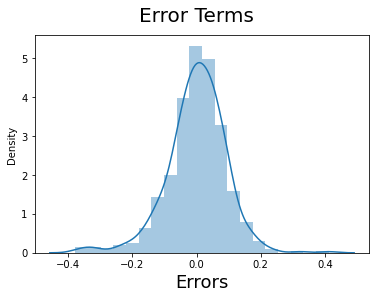

In [572]:
#Plotting the graph of errors to validate the assumption as the mean of errors lies at 0.
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)           #Plotting graph.
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading .
plt.xlabel('Errors', fontsize = 18)                         #plotting label.

#Observation
#The mean value of errors lies at 0.0

In [573]:
#Preparing and Scaling the test set.
num_vars = ['atemp','hum','windspeed','cnt','day']

data_test[num_vars]=scaler.transform(data_test[num_vars])

In [574]:
#Extracting the target variable.
y_test = data_test.pop('cnt')
X_test = data_test

In [575]:
#Creating the dataset same as the train set.
X_test_new = X_test[col]

In [576]:
#Adding constant to the test set.
X_test_new = sm.add_constant(X_test_new)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [577]:
#Predicting values of target variable from the chosen model. 
y_test_pred = lm.predict(X_test_new)

In [578]:
#Evaluating the model.
r2_score(y_true = y_test,y_pred=y_test_pred)

0.8074810403349371

The prediction of 80% value is within 5% range of the training accuract that is 83% hence ths is an optimal Linear Regression Model.